In [1]:
import pandas as pd 

In [8]:
df = pd.read_csv('/Users/yeominji/Desktop/서울대기오염_2019.csv', encoding='utf-8-sig')
print(df.head())


           날짜 측정소명  미세먼지  초미세먼지     오존  이산화질소\nNO2 (ppm)  일산화탄소\nCO (ppm)  \
0          전체   평균  42.0   25.0  0.025             0.028              0.5   
1  2019-12-31   평균  26.0   15.0  0.022             0.016              0.4   
2  2019-12-31  강남구  22.0   14.0  0.025             0.014              0.4   
3  2019-12-31  강동구  27.0   19.0  0.019             0.020              0.4   
4  2019-12-31  강북구  31.0   17.0  0.022             0.022              0.4   

   아황산가스\nSO2(ppm)  
0            0.004  
1            0.003  
2            0.003  
3            0.003  
4            0.002  


In [10]:
df.head()

,날짜,측정소명,미세먼지,초미세먼지,오존,이산화질소\nNO2 (ppm),일산화탄소\nCO (ppm),아황산가스\nSO2(ppm)
0,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
1,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
3,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
4,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002


In [ ]:
df = df[df['날짜'] != '전체']

df = df[['날짜', '측정소명', '미세먼지', '초미세먼지']]
df.columns = ['date', 'district', 'pm10', 'pm25']


In [34]:
#결측치 확인 및 제거
df.isnull().sum()
df= df.dropna()
print(df.head())

         date district  pm10  pm25
2  2019-12-31      강남구  22.0  14.0
3  2019-12-31      강동구  27.0  19.0
4  2019-12-31      강북구  31.0  17.0
5  2019-12-31      강서구  29.0  16.0
6  2019-12-31      관악구  36.0  18.0


In [35]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') 
df['pm10'] = df['pm10'].astype(float) 
df['pm25'] = df['pm25'].astype(float)  

In [36]:
print(df.columns)

Index(['date', 'district', 'pm10', 'pm25'], dtype='object')


In [37]:
print(df[['pm25','pm10']].describe())

              pm25         pm10
count  8738.000000  8738.000000
mean     25.097620    42.019112
std      18.536977    26.872004
min       1.000000     3.000000
25%      14.000000    24.000000
50%      21.000000    36.000000
75%      30.000000    52.000000
max     153.000000   228.000000


In [ ]:
df['month'] = df['date'].dt.month #파생변수 생성 
df['day'] = df['date'].dt.day

In [ ]:
def season(month): #달을 각 계절에 맞게 나누기
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'

In [40]:
df['season'] = df['month'].apply(season)

In [42]:
print(df.head) #최종 분석대상 데이터 확인 

<bound method NDFrame.head of            date district  pm10  pm25  month  day  season
2    2019-12-31      강남구  22.0  14.0     12   31  winter
3    2019-12-31      강동구  27.0  19.0     12   31  winter
4    2019-12-31      강북구  31.0  17.0     12   31  winter
5    2019-12-31      강서구  29.0  16.0     12   31  winter
6    2019-12-31      관악구  36.0  18.0     12   31  winter
...         ...      ...   ...   ...    ...  ...     ...
9486 2019-01-01      용산구  30.0  24.0      1    1  winter
9487 2019-01-01      은평구  33.0  22.0      1    1  winter
9488 2019-01-01      종로구  34.0  21.0      1    1  winter
9489 2019-01-01       중구  36.0  25.0      1    1  winter
9490 2019-01-01      중랑구  34.0  25.0      1    1  winter

[8738 rows x 7 columns]>


In [43]:
import os

In [47]:
import os

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
output_path = os.path.join(desktop_path, "card_output.csv")

df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [ ]:
avg_pm10 = df['pm10'].mean() #평균구하기
print(avg_pm10)
#분석결과: 연간 평균 미세먼지 상태는 약 42로 보통상태이다.

42.01911192492561


In [ ]:
#미세먼지 최대 날짜와 구 출력 
max_pm10 = df['pm10'].max()
max_pm10_info = df[df['pm10'] == max_pm10][['date', 'district', 'pm10']]
print(max_pm10)
print(max_pm10_info)
#분석결과, 19년도 3월에 강북구에서 미세먼지 228로 매우나쁨 수준을 보임

228.0
           date district   pm10
7830 2019-03-05      강북구  228.0


In [ ]:
#각 구별 평균을 계산하여 탑 5 보기 
pm10_avg = df.groupby('district')['pm10'].mean().reset_index(name='avg_pm10')
top5_pm10 = pm10_avg.sort_values(by='avg_pm10', ascending=False).head(5)
print(top5_pm10)
#각 구별 가장 평균 미세먼지가 높은 군은 관악구이며 5번쨰로 높은곳은 성동구이다.

   district   avg_pm10
4       관악구  49.050167
18      양천구  47.732782
12      마포구  47.506250
3       강서구  46.289694
15      성동구  44.898072


In [ ]:
#미세먼지와 초미세먼지 계절 평균계산하기
season_avg = df.groupby('season')[['pm10', 'pm25']].mean().reset_index()
season_avg_sorted = season_avg.sort_values(by='pm10') #정렬
print(season_avg_sorted)
#분석결과 여름에 겨울에 미세먼지와 초미세먼지 둘다 평균이 높은 것으로 보임 겨울에 미세먼지가 많은 경향이 있음

   season       pm10       pm25
2  summer  26.422101  18.166214
0  autumn  31.203685  15.743028
1  spring  54.136007  31.582389
3  winter  54.747756  33.720826


In [ ]:
#pm10을 등급을 나누는 함수 
def pm10_grade(x):
    if x <= 30:
        return 'good'
    elif x <= 80:
        return 'normal'
    elif x <= 150:
        return 'bad'
    else:
        return 'worse'

df['pm_grade'] = df['pm10'].apply(pm10_grade)

In [ ]:
#등급별 빈도와 비율을 
grade_dist = df['pm_grade'].value_counts().reset_index()
grade_dist.columns = ['pm_grade', 'n']
grade_dist['pct'] = (grade_dist['n'] / grade_dist['n'].sum() * 100).round(2)
print(grade_dist)
#분석결과, 보통의 빈도와 비율이 가장 높은 것으로 보인다.

  pm_grade     n    pct
0   normal  4765  54.53
1     good  3293  37.69
2      bad   599   6.86
3    worse    81   0.93


In [ ]:
#구별 등급 분포 중 'good' 빈도와 전체 대비 비율 계산
good_cnt = df[df['pm_grade'] == 'good'].groupby('district').size().reset_index(name='n')
total_cnt = df.groupby('district').size().reset_index(name='total')
good_pct = pd.merge(good_cnt, total_cnt, on='district')
good_pct['pct'] = (good_pct['n'] / good_pct['total'] * 100).round(2)

top5_good = good_pct.sort_values(by='pct', ascending=False).head(5)
print(top5_good)
#용산구가 가장 미세먼지 좋음 빈도가높고 비율도 가장 높아 용산구 쪽이 미세먼지가 좋음을 알 수 있다

   district    n  total    pct
20      용산구  196    363  53.99
24      중랑구  143    318  44.97
22      종로구  162    364  44.51
9       도봉구  162    365  44.38
7       금천구  161    363  44.35


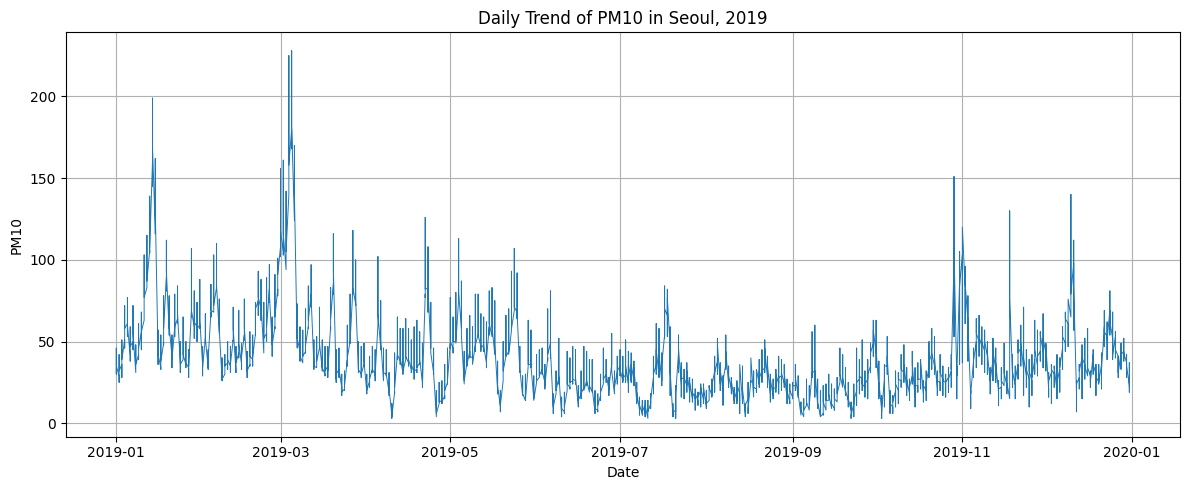

In [ ]:
#선 그래프 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['pm10'], linewidth=0.7)
plt.title('Daily Trend of PM10 in Seoul, 2019')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.grid(True)
plt.tight_layout()
plt.show()
#그래프를 확인하보면 1월과 3월 11월 이렇게 미세먼지가 높은 것을 알 수 있고 3월이 가장 높은 것으로 보이고 나머지 4월부터 10월 까지는 비슷한 경향을 보인다.

In [70]:
import seaborn as sns

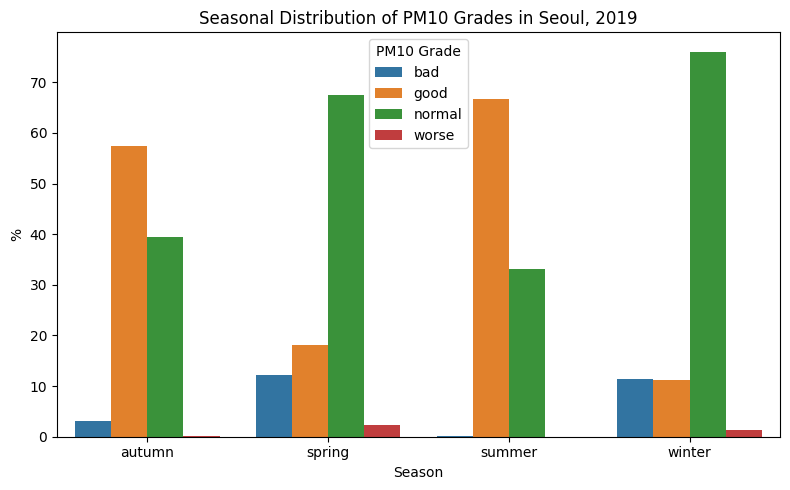

In [ ]:
#x축: season, y축: pct, fill: pm_grade (막대그래프 - seaborn barplot)
season_grade = df.groupby(['season', 'pm_grade']).size().reset_index(name='n')

#각 시즌별 비율계산
season_total = df.groupby('season').size().reset_index(name='total')
season_grade = pd.merge(season_grade, season_total, on='season')
season_grade['pct'] = (season_grade['n'] / season_grade['total'] * 100).round(2)

#사각화 막대그래프
plt.figure(figsize=(8, 5))
sns.barplot(data=season_grade, x='season', y='pct', hue='pm_grade')
plt.title('Seasonal Distribution of PM10 Grades in Seoul, 2019')
plt.ylabel('%')
plt.xlabel('Season')
plt.legend(title='PM10 Grade')
plt.tight_layout()
plt.show()

#미세먼지 보통이 가장 높을 많을 때는 겨울이고 그 다음은 비슷하게 봄, 미세먼지가 가장 좋은 날이 많을 떄는 여름과 가을, 나쁨이 많을 떄는 봄과 겨울로 미세먼지가 안좋은 날이 많은 계절은 봄과 겨울, 좋을 때는 여름과 가을로 볼 수 있다,